In [26]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!pip install ultralytics supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 24.9 MB/s eta 0:00:00


In [4]:
!nvidia-smi

Thu Jan 29 05:40:31 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:


# Copy the dataset ZIP to the current working directory
!scp -r "/content/drive/MyDrive/AIEngineer/ComputerVision/Dataset/Skin-Problem-Detection-Relabel-Clean3.v2i.yolov12.zip"

usage: scp [-346ABCOpqRrsTv] [-c cipher] [-D sftp_server_path] [-F ssh_config]
           [-i identity_file] [-J destination] [-l limit]
           [-o ssh_option] [-P port] [-S program] source ... target


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
!unzip "/content/drive/MyDrive/AIEngineer/ComputerVision/Dataset/Skin-Problem-Detection-Relabel-Clean3.v2i.yolov12.zip"

Archive:  /content/drive/MyDrive/AIEngineer/ComputerVision/Dataset/Skin-Problem-Detection-Relabel-Clean3.v2i.yolov12.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: README.dataset.txt      
replace README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: README.roboflow.txt     
replace data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.yaml               
replace test/images/103_jpg.rf.667806df7be23ab76e06bcdfb89e140e.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test/images/103_jpg.rf.667806df7be23ab76e06bcdfb89e140e.jpg  
replace test/images/104_jpg.rf.f53374c55bf205e278f1d60fc96637a5.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test/images/104_jpg.rf.f53374c55bf205e278f1d60fc96637a5.jpg  
replace test/images/112_jpg.rf.b7b8c80a667711e01ee9c8c266ac1234.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: test/images/112_jpg.rf.b7b8c80a667711e01ee9c8c266ac1234.jpg  
 extracting: test

In [30]:
dataset_location = "/content/"

In [31]:
# List the contents of the /content directory to find the unzipped dataset folder
!ls -F {dataset_location}

data.yaml	    README.roboflow.txt  test/	 yolov12n.pt
drive/		    runs/		 train/  yolov12n.pt.1
README.dataset.txt  sample_data/	 valid/


In [32]:
!cat {dataset_location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 10
names: ['Acne', 'Blackheads', 'Dark-Spots', 'Dry-Skin', 'Englarged-Pores', 'Eyebags', 'Oily-Skin', 'Skin-Redness', 'Whiteheads', 'Wrinkles']

roboflow:
  workspace: parin-kittipongdaja-vwmn3
  project: skin-problem-detection-relabel-clean3
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/parin-kittipongdaja-vwmn3/skin-problem-detection-relabel-clean3/dataset/2

In [33]:
!wget https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt

--2026-01-29 08:15:16--  https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12n.pt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/928546208/99db71db-0946-4c10-94a0-b54baf471037?sp=r&sv=2018-11-09&sr=b&spr=https&se=2026-01-29T09%3A15%3A48Z&rscd=attachment%3B+filename%3Dyolov12n.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2026-01-29T08%3A15%3A11Z&ske=2026-01-29T09%3A15%3A48Z&sks=b&skv=2018-11-09&sig=jfchfcpwTN02m9M%2B7RItyAK%2FWuSH2WaGcALKCB9DsUI%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2OTY3NDgxNiwibmJmIjoxNzY5Njc0NTE2LCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ibG9iLm

In [34]:
from ultralytics import YOLO

model = YOLO('yolov12n.pt')

In [35]:
results = model.train(
        data=f'{dataset_location}/data.yaml', # Using 20 epochs for faster training
        epochs=20,
        batch=16,
        imgsz=640,
        exist_ok=True,
        patience=5,              # Early stopping if no improvement for 5 epochs
        save_period=5,           # Save checkpoints every 5 epochs
        val=True,                # Ensure validation is performed
        verbose=True,            # Show detailed output during training
        flipud=0.5,              # Augmentation using vertical flip probability
)

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content//data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0, plots=Tr

In [37]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# Lists training artifacts such as weights, result plots, and confusion matrix.
!ls {HOME}/runs/detect/train/

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1130.jpg  val_batch1_pred.jpg
BoxR_curve.png			 train_batch1131.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch1132.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch1.jpg     weights
labels.jpg			 train_batch2.jpg


In [38]:
import os
HOME = os.getcwd()

# Lists training artifacts such as weights, result plots, and confusion matrix.
!ls {HOME}/runs/detect/train/

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1130.jpg  val_batch1_pred.jpg
BoxR_curve.png			 train_batch1131.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch1132.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch1.jpg     weights
labels.jpg			 train_batch2.jpg


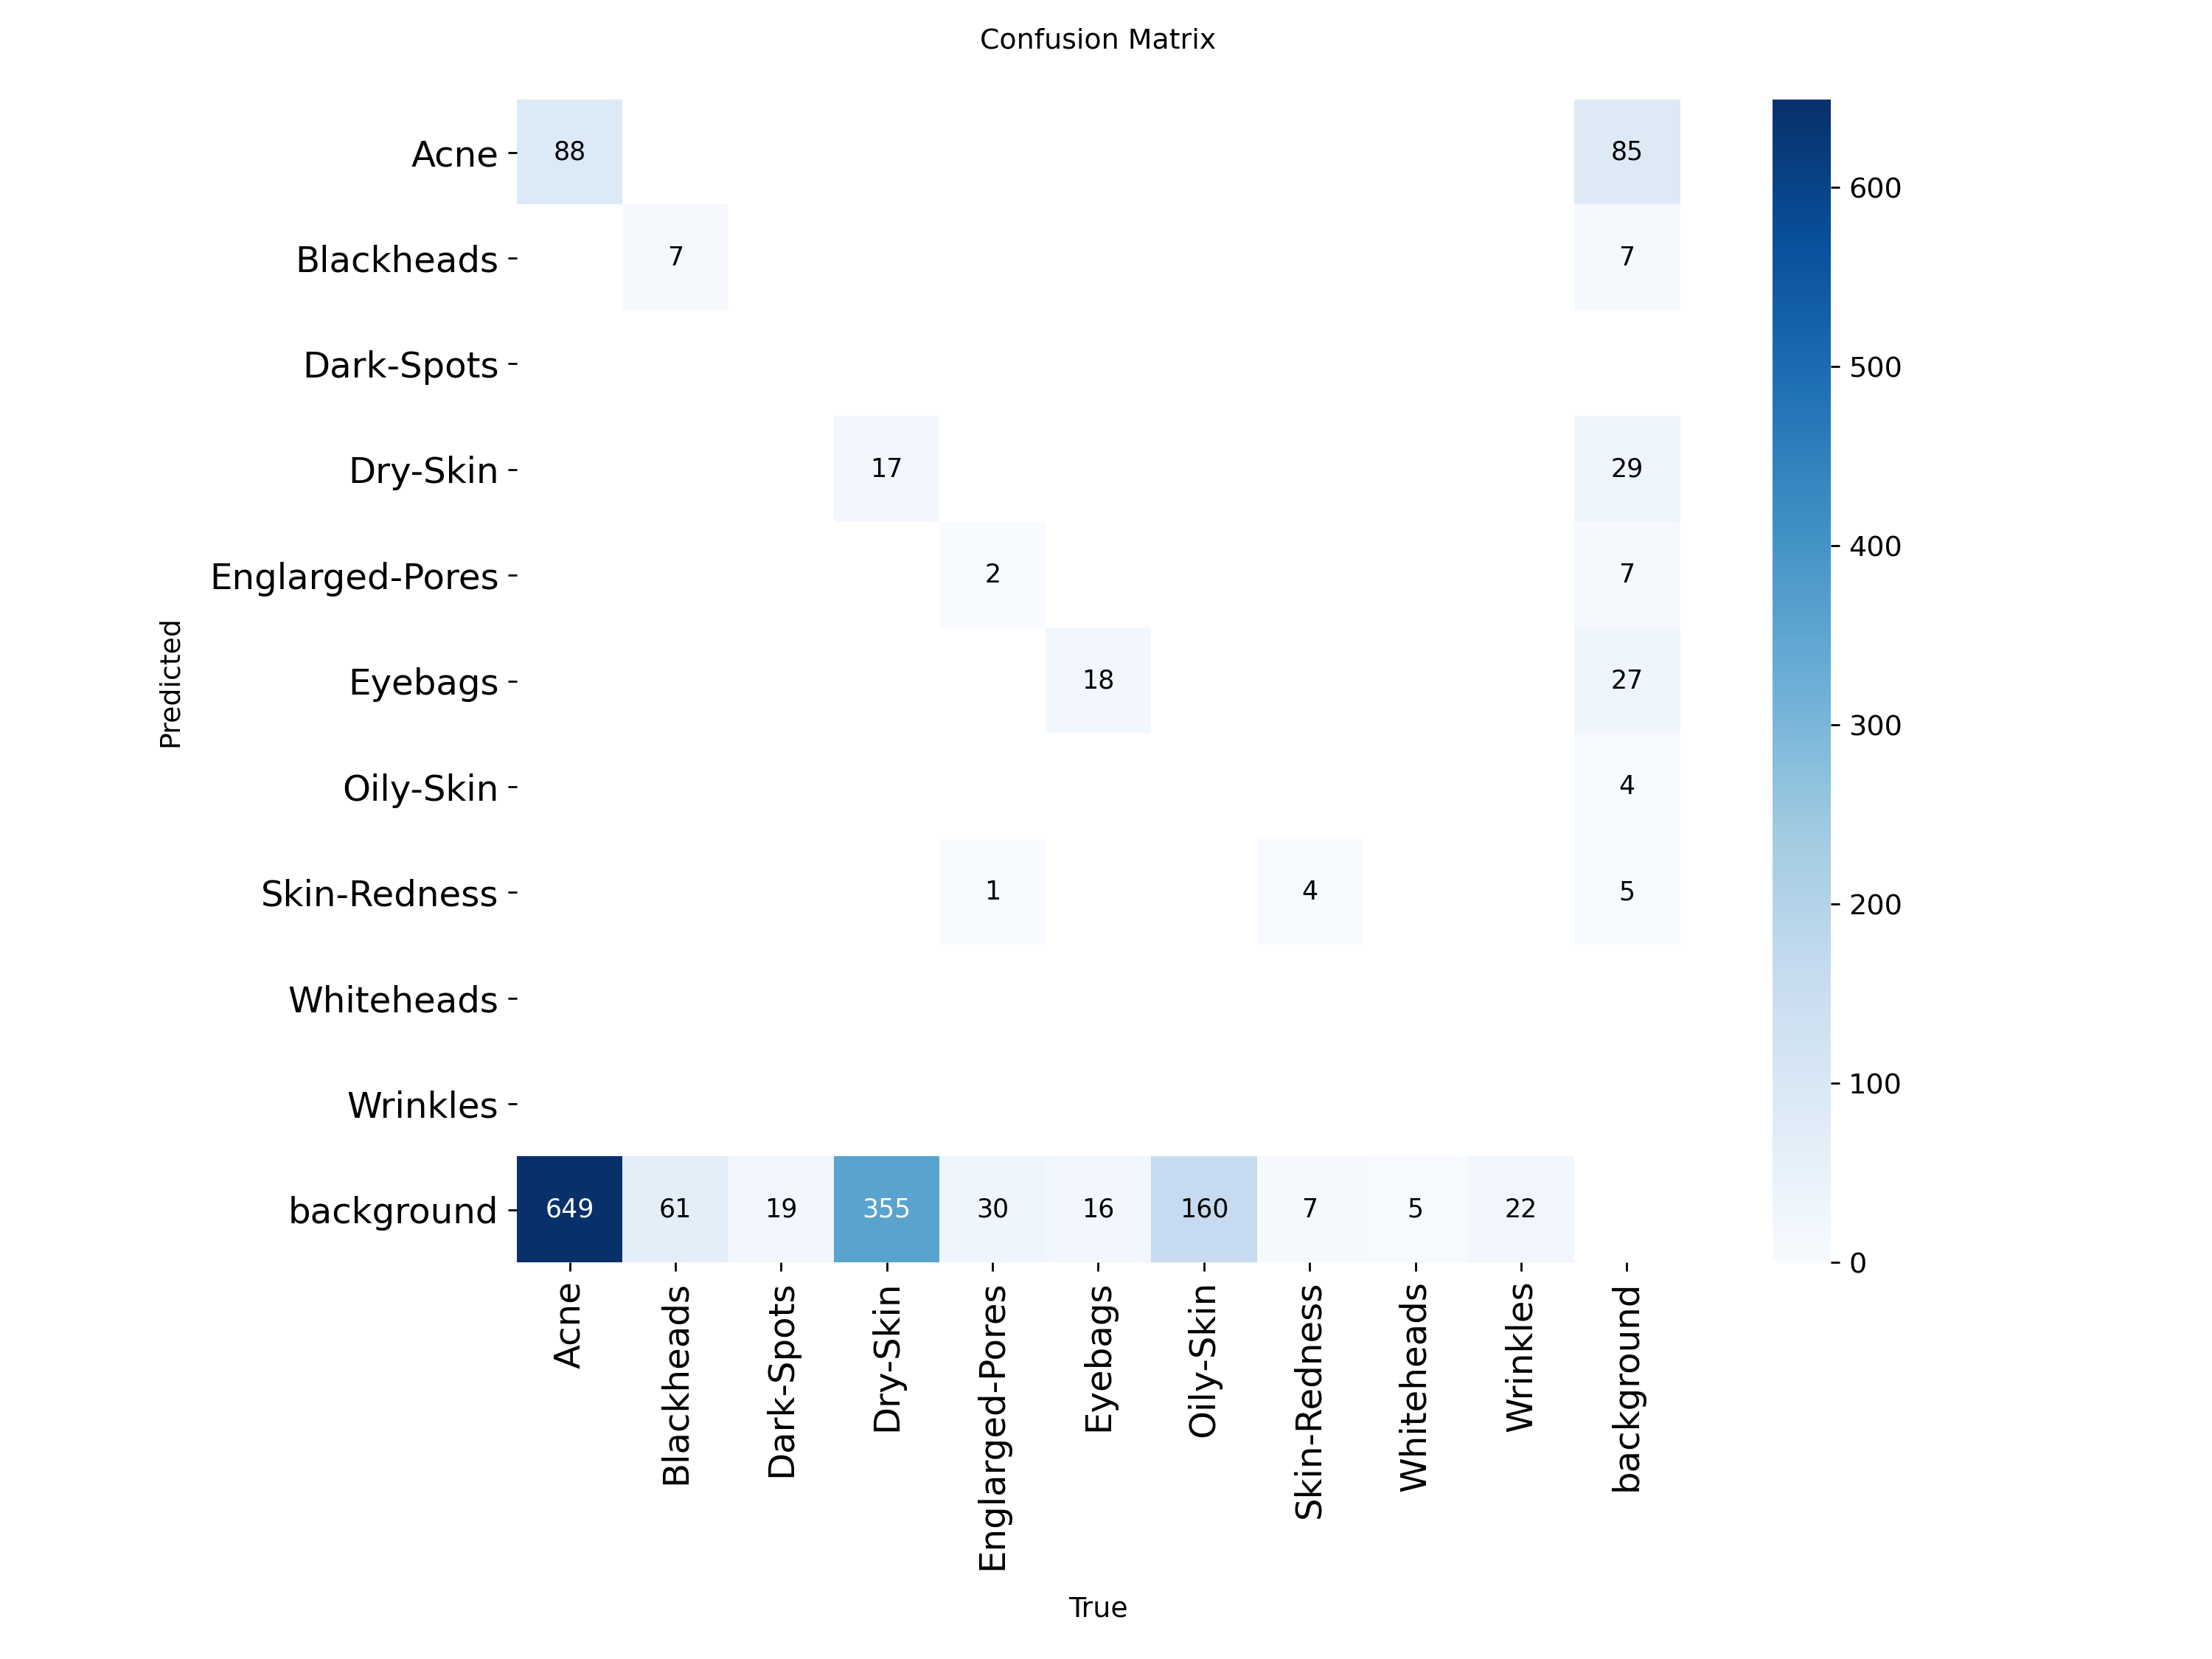

In [39]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

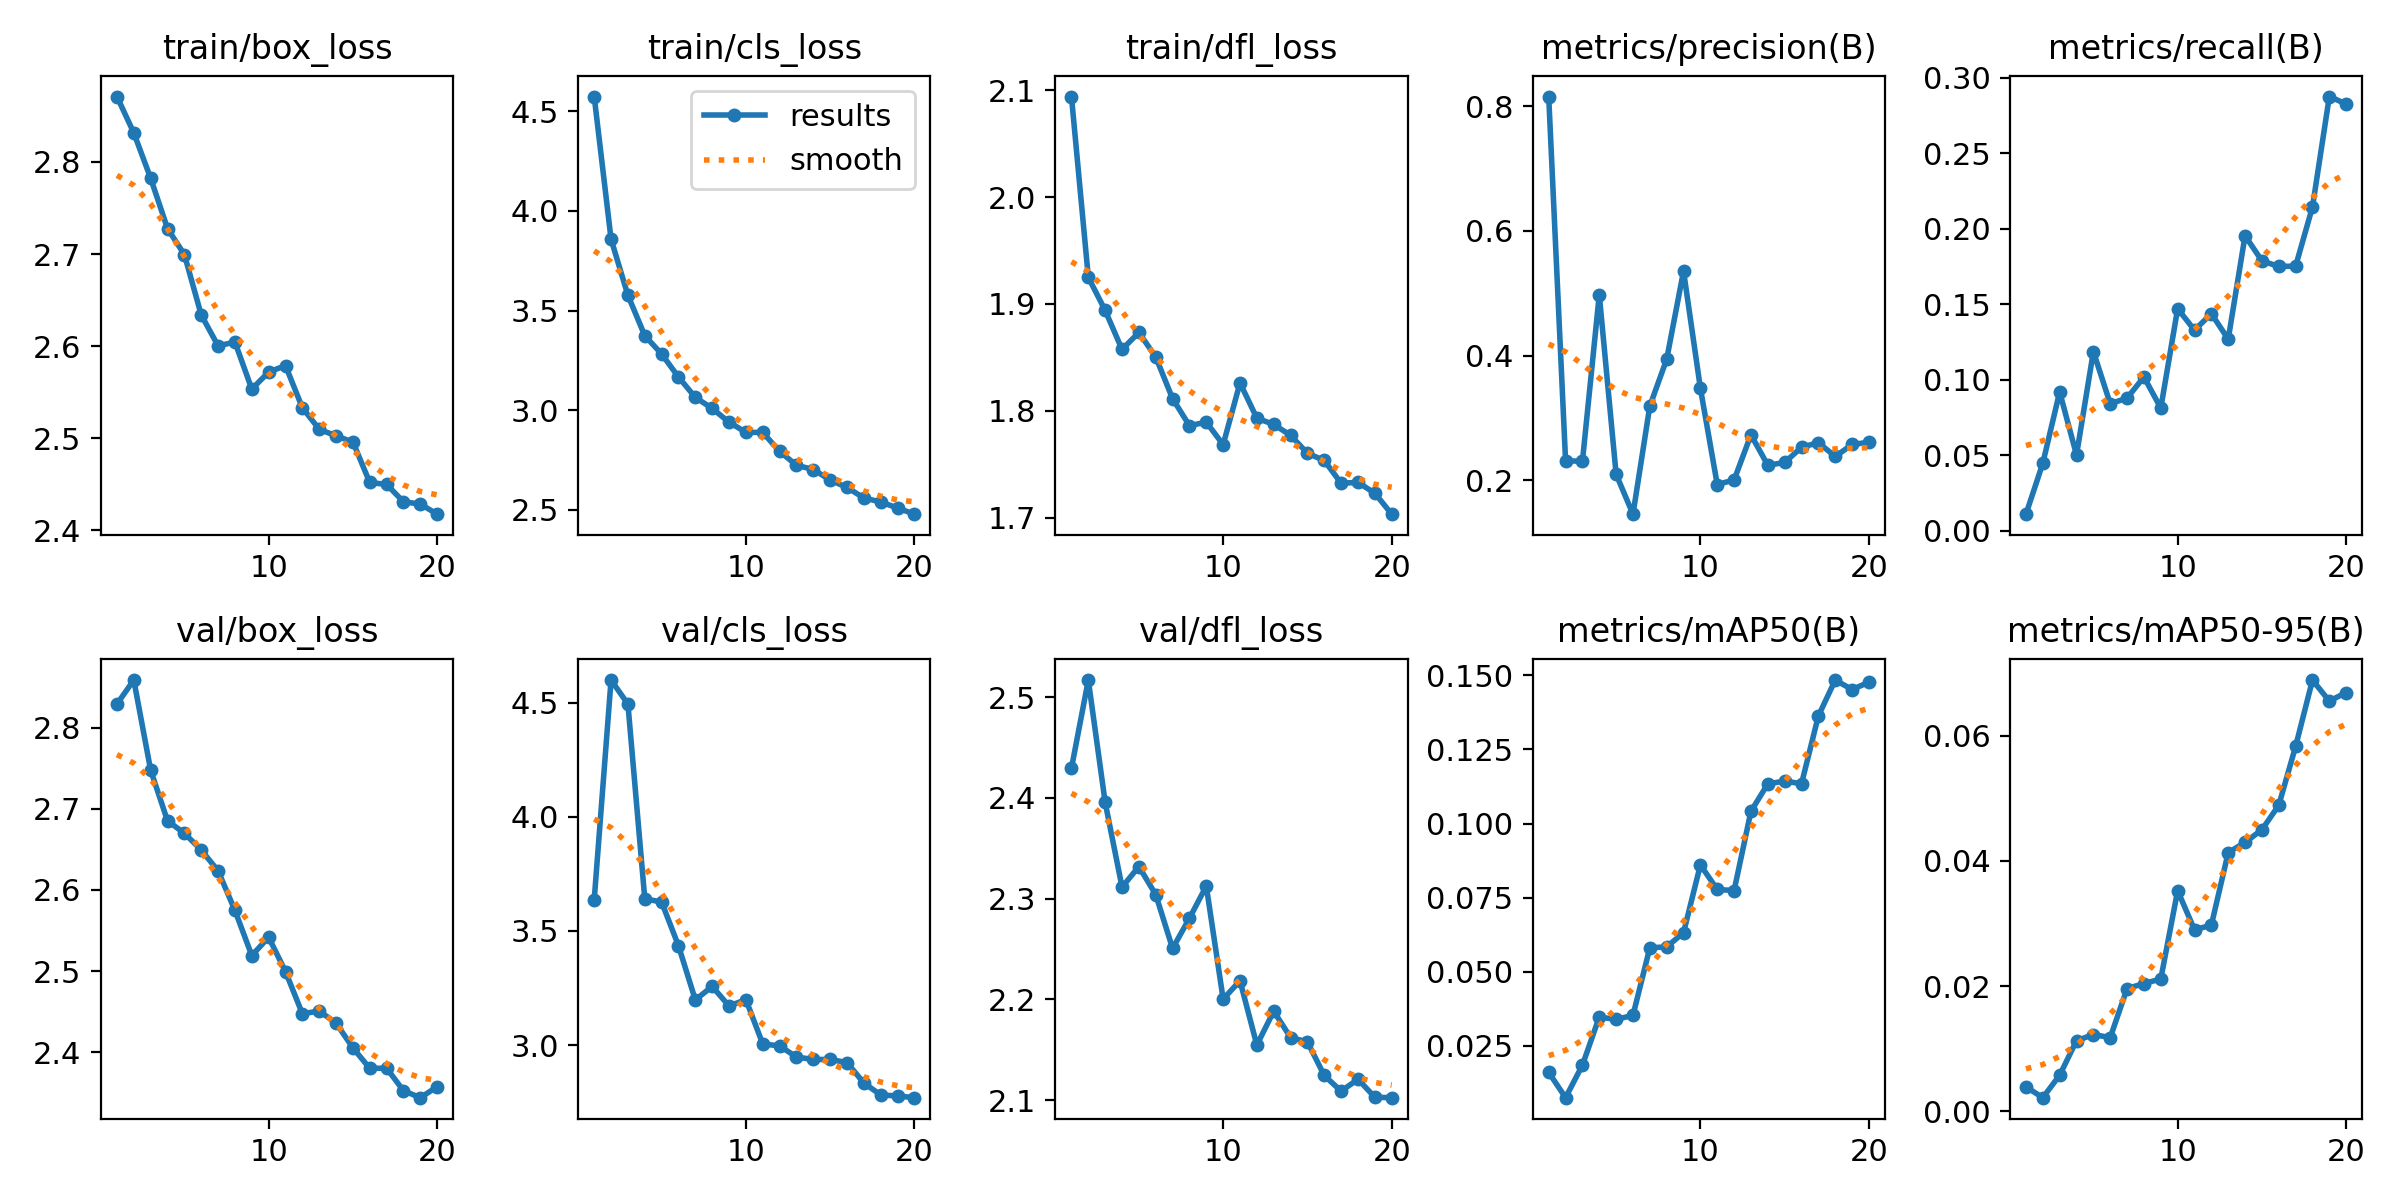

In [40]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [41]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_location}/test/images",
    annotations_directory_path=f"{dataset_location}/test/labels",
    data_yaml_path=f"{dataset_location}/data.yaml"
)

ds.classes

['Acne',
 'Blackheads',
 'Dark-Spots',
 'Dry-Skin',
 'Englarged-Pores',
 'Eyebags',
 'Oily-Skin',
 'Skin-Redness',
 'Whiteheads',
 'Wrinkles']

In [42]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [44]:
!scp /content/runs/detect/train/weights/best.pt "/content/drive/MyDrive/AIEngineer/ComputerVision/Dataset" # REPLACE "Your_Folder" with your desired folder in Google Drive